<a href="https://colab.research.google.com/github/Joongeun/Internship/blob/main/VADER_Sent_Analysis_BertTopic_on_Exp%2BAdvice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
import numpy as np
import pandas as pd
import json

In [ ]:
# #encoding='utf-8' so that emojis (unicode character) can be translated to binary - otherwise, error will result
# with open(r'/content/sample_data/QuitVaping_submissions', 'r', encoding='utf-8') as f:
#   df = pd.read_json(f, lines=True)
# df.to_csv('all_posts_csv.csv', encoding='utf-8', index=False)

In [ ]:
df = pd.read_csv('/content/QuitVaping Score, Selftext, Created_UTC - preprocessed_csv.csv.csv')
print(df)

In [ ]:
import math
for ind, i in enumerate(df['selftext']):
  if type(i) != str and math.isnan(i):
    df.drop(ind, inplace=True)
  elif "[removed]" in i or "[deleted]" in i:
    df.drop(ind, inplace=True)
print(df['selftext'])

In [ ]:
df = df.reset_index()
print(df['selftext'])

In [ ]:
posts = list(df['selftext'])
print(len(posts))

df2 = df.copy()['selftext'].drop_duplicates(keep = 'first')
print(len(df2))
for ind, i in enumerate(df2):
  if posts.count(i) > 1:
    df.drop(posts.index(i), inplace=True)
    posts.remove(i)
    print(len(posts), len(df))
print(len(df))

In [ ]:
import copy
exp_posts = copy.deepcopy(df)
for ind, i in enumerate(df['labels']):
  if i not in [2.0, 4.0]:
    exp_posts.drop(ind, inplace=True)
exp_posts = exp_posts.reset_index()
exp_posts

,level_0,index,score,selftext,created_utc,labels
0,3,3,1,I moved from cigarettes to my vape three years...,1537340982,4.0
1,4,4,4,I vape constantly.. started about 5 years ago....,1544777392,4.0
2,6,6,3,I’m 25 and I picked up smoking in rehab and en...,1545355520,4.0
3,13,13,3,Took apart my RDA to change cotton but thought...,1551946400,4.0
4,15,15,11,"Hello, everyone! I'm glad to see that this sub...",1554167339,4.0
...,...,...,...,...,...,...
1388,3481,3481,3,Going to try once again to quit starting tomor...,1643413561,4.0
1389,3482,3482,0,I want to quit but I'd rather keep vaping then...,1643420017,4.0
1390,3483,3483,8,I threw everything in some hole I stumbled upo...,1643425485,4.0
1391,3490,3490,3,"I took my last hit at 4pm yesterday, it’s now ...",1643481683,4.0


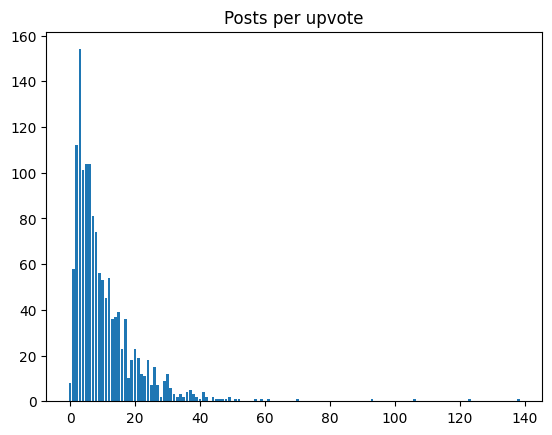

In [ ]:
import matplotlib.pyplot as plt
post_dict = {}
for score in exp_posts['score']:
  if score in post_dict:
      post_dict[score] += 1
  else:
      post_dict[score] = 1
plt.bar(list(post_dict.keys()), list(post_dict.values()))
plt.title('Posts per upvote')
plt.show()

In [ ]:
scores = list(exp_posts['score'])
for ind, i in enumerate(sorted(scores)):
  if ind == 348:
    low = i
  if ind == 696:
    mid = i
  if ind == 1044:
    high = i

texts = [[], [], [], []]
for ind, score in enumerate(exp_posts['score']):
  if score <= low:
    texts[0].append(exp_posts['selftext'][ind])
  elif score > low and score <=mid:
    texts[1].append(exp_posts['selftext'][ind])
  elif score > mid and score <= high:
    texts[2].append(exp_posts['selftext'][ind])
  else:
    texts[3].append(exp_posts['selftext'][ind])

low = {"text": texts[0]}
low_mid = {"text": texts[1]}
high_mid = {"text": texts[2]}
high = {"text": texts[3]}
low_df = pd.DataFrame(low)
low_mid_df = pd.DataFrame(low_mid)
high_mid_df = pd.DataFrame(high_mid)
high_df = pd.DataFrame(high)

In [ ]:
#Make new column "label" to store the dictionary of sentiment intensity (intensity of pos/neg/neut sent.)
# df['label'] = df['selftext'].apply(lambda review:sid.polarity_scores(review))
low_df['sentiment_scores'] = low_df['text'].apply(lambda review:sid.polarity_scores(review))
low_mid_df['sentiment_scores'] = low_mid_df['text'].apply(lambda review:sid.polarity_scores(review))
high_mid_df['sentiment_scores'] = high_mid_df['text'].apply(lambda review:sid.polarity_scores(review))
high_df['sentiment_scores'] = high_df['text'].apply(lambda review:sid.polarity_scores(review))

In [ ]:
from pprint import pprint
#Example
# pprint(exp_posts['selftext'][100])
# print(exp_posts['score'][100])
# print(exp_posts['created_utc'][100])
# print(exp_posts['sentiment_scores'][100])
# print(exp_posts['sentiment_scores'][100]['compound'])
pprint(high_df['text'][100])
print(high_df['sentiment_scores'][100])

("I'm 16 weeks pregnant. It was an unplanned pregnancy so for the first 3-4 "
 'weeks I felt so overwhelmed and stressed out by the news that I felt like I '
 "couldn't quit the vape. Have been vaping consistently for 7 years and I "
 "loved the calm effect it had on my brain. I'm a naturally anxious person so "
 'I guess I saw it as my crutch. \n'
 '\n'
 'After some time, I knew that I simply had to quit and grab the bull by the '
 'horns. There is very little research about the effects of vaping on pregnant '
 'women and fetal development. But why take the risk? We know that it does not '
 "offer any benefits so realistically it can't be good. The guilt I felt that "
 'I could potentially be doing something damaging and harmful to this little '
 'human who has say or control over it was killing me and eating me up.\n'
 '\n'
 "I started off by downloading Allen Carr's easyway audible book. I listened "
 'to it all in two days. It was originally designed to help people quit '
 'smoking

In [ ]:
def average(scores):
  sum = 0
  for score in scores:
    sum += score['compound']
  return str(sum/len(posts))
print("Average compound sentiment for lowest 25% = "+ average(low_df['sentiment_scores']))
print("Average compound sentiment for lower middle 25% = "+ average(low_mid_df['sentiment_scores']))
print("Average compound sentiment for higher middle 25% = "+ average(high_mid_df['sentiment_scores']))
print("Average compound sentiment highest 25% = "+ average(high_df['sentiment_scores']))

Average compound sentiment for lowest 25% = 0.0007164107857050699
Average compound sentiment for lower middle 25% = 0.006453515675396721
Average compound sentiment for higher middle 25% = 0.011280479938072506
Average compound sentiment highest 25% = 0.013575319313636966


In [ ]:
!pip install bertopic
from bertopic import BERTopic
import json
import pandas as pd
from google.colab import files

In [ ]:
!pip install nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import re

stop_words = set(stopwords.words('english'))
def clean_text(posts):
  cleaned_posts = []
  for sentences in posts:
    split = re.findall(r"[\w']+|[!?]", sentences)
    i = 0
    while i < len(split)-1:
      if split[i] == split[i+1]:
        del split[i+1]
        i-=1
      i+= 1
    # Remove all instances of \n where only the n remains
    split = [i for i in split if i != "n" and i not in stop_words]
    cleaned_posts.append(" ".join(split))
  return cleaned_posts

In [ ]:
l, l_m, h_m, h = map(list, [low_df["text"], low_mid_df["text"], high_mid_df["text"], high_df["text"]])
l, l_m, h_m, h = map(clean_text, [l, l_m, h_m, h])
topic_model = BERTopic()
def get_topic(saved_column, name):
  #print(len(topics)) will print 3397 - "topics" is a list of numbers that labels posts with topics
  topics, probs = topic_model.fit_transform(saved_column)
  topic_model.get_topic_info()
  freq = topic_model.get_topic_info()
  freq.to_csv(name+".csv", index=False)
  fig = topic_model.visualize_barchart()
  fig.write_html(name)
  for i in range(len(freq)):
    print(freq.iloc[i])  # freq.iloc[i][0, 1, 2, 3, 4] will get columns

get_topic(l, "low")
print("=" * 20)
get_topic(l_m, "low_mid")
print("=" * 20)
get_topic(h_m, "high_mid")
print("=" * 20)
get_topic(h, "high")

Topic                                                                 -1
Count                                                                124
Name                                             -1_quit_vaping_day_last
Representation         [quit, vaping, day, last, feel, week, like, im...
Representative_Docs    [I know I ready quit I want quit turn 21 June ...
Name: 0, dtype: object
Topic                                                                  0
Count                                                                270
Name                                         0_vaping_nicotine_vape_quit
Representation         [vaping, nicotine, vape, quit, like, day, im, ...
Representative_Docs    [I'm moment I realise bad got I've vaping 20mg...
Name: 1, dtype: object
Topic                                                                  1
Count                                                                 39
Name                                           1_cravings_vaping_time_im
Repre

In [ ]:
#Save posts and scores for each post as csv
selected_columns = exp_posts[['selftext', 'sentiment_scores']]
selected_columns.to_csv('VADER2.csv', index=False)

In [ ]:
#Test a new "post" to see if it is pos/neg/neut
review = "I hate my life and am very depressed. I have tried many times to quit vaping but always failed. I want to quit really bad but I feel helpless"
sid.polarity_scores(review)